In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('data.xlsx')
df.head()

CEMENT_RATIO  FINE_AGGREGATE_RATIO  ...  CONCRETE_GRADE  COMPRESSIVE_STRENGTH 
0             1                  1.58  ...             M25                  36.84
1             1                  1.43  ...             M30                  43.13
2             1                  1.54  ...             M30                  38.58
3             1                  1.28  ...             M35                  47.16
4             1                  1.39  ...             M35                  45.05

[5 rows x 7 columns]

In [ ]:
df.columns

Index(['CEMENT_RATIO', 'FINE_AGGREGATE_RATIO', 'COARSE_AGGREGATE_RATIO',
       'FLY_ASH_RATIO', 'WC_RATIO', 'CONCRETE_GRADE', 'COMPRESSIVE_STRENGTH '],
      dtype='object')

In [ ]:
X = df[['CEMENT_RATIO', 'FINE_AGGREGATE_RATIO', 'COARSE_AGGREGATE_RATIO',
       'FLY_ASH_RATIO', 'WC_RATIO', 'CONCRETE_GRADE']]

In [ ]:
X = pd.get_dummies(data=X, drop_first=True)
X

CEMENT_RATIO  FINE_AGGREGATE_RATIO  ...  CONCRETE_GRADE_M40  CONCRETE_GRADE_M45
0               1                  1.58  ...                   0                   0
1               1                  1.43  ...                   0                   0
2               1                  1.54  ...                   0                   0
3               1                  1.28  ...                   0                   0
4               1                  1.39  ...                   0                   0
..            ...                   ...  ...                 ...                 ...
125             1                  1.06  ...                   0                   1
126             1                  1.05  ...                   0                   1
127             1                  1.28  ...                   0                   1
128             1                  1.00  ...                   0                   1
129             1                  1.11  ...                   1                   0

[130 rows x 10 columns]

In [ ]:
Y = df['COMPRESSIVE_STRENGTH ']
Y

0      36.84
1      43.13
2      38.58
3      47.16
4      45.05
       ...  
125    54.40
126    55.04
127    54.67
128    54.05
129    49.70
Name: COMPRESSIVE_STRENGTH , Length: 130, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=101, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 10)
(13, 10)
(117,)
(13,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept
print(model.intercept_)

37.85778658143859


In [ ]:
predictions = model.predict(X_test)
predictions

array([50.03425497, 40.58261732, 30.037811  , 33.9635424 , 54.46004199,
       34.75857572, 45.65578286, 45.67923019, 33.06642921, 40.38589534,
       45.41382754, 40.82200633, 51.02136942])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


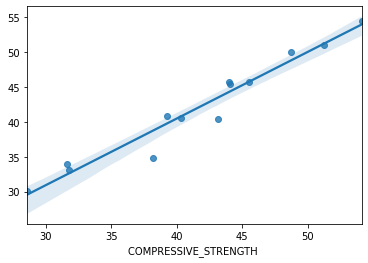

In [ ]:
sns.regplot(y_test,predictions)

In [ ]:
model.score(X_test, y_test) * 100

94.73455293011999

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as f:
  pickle.dump(model, f)

In [ ]:
grades = list(df['CONCRETE_GRADE'].unique())
grades

['M25', 'M30', 'M35', 'M40', 'M45', 'M20']

In [ ]:
grade = df['CONCRETE_GRADE']
grade = pd.get_dummies(data=grade, drop_first=True)
grade

M25  M30  M35  M40  M45
0      1    0    0    0    0
1      0    1    0    0    0
2      0    1    0    0    0
3      0    0    1    0    0
4      0    0    1    0    0
..   ...  ...  ...  ...  ...
125    0    0    0    0    1
126    0    0    0    0    1
127    0    0    0    0    1
128    0    0    0    0    1
129    0    0    0    1    0

[130 rows x 5 columns]

In [ ]:
values = grade.drop_duplicates(ignore_index=True)
values

M25  M30  M35  M40  M45
0    1    0    0    0    0
1    0    1    0    0    0
2    0    0    1    0    0
3    0    0    0    1    0
4    0    0    0    0    1
5    0    0    0    0    0

In [ ]:
grade_dict = dict()
for i in range(len(grades)):
  grade_dict[grades[i]] = list(values.iloc[i])
grade_dict

{'M20': [0, 0, 0, 0, 0],
 'M25': [1, 0, 0, 0, 0],
 'M30': [0, 1, 0, 0, 0],
 'M35': [0, 0, 1, 0, 0],
 'M40': [0, 0, 0, 1, 0],
 'M45': [0, 0, 0, 0, 1]}